# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
from scipy import stats
medical = pd.read_csv('/Users/markclampitt/Documents/Springboard/Case_Study_Stat_Inference/insurance2.csv')

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__As shown in the histogram below, the data is not normally distributed. The distribution is right tailed. The mean is 13K, and the standard deviation is 12k, meaning that within two standard deviations the charge could be negative. Therefore as is, these stats from the sample data cannot be used to estimate properly for the population. 

Text(0, 0.5, 'Count')

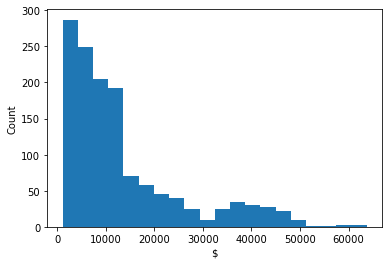

In [4]:
plt.hist(medical['charges'],bins=20)
plt.xlabel('$')
plt.ylabel('Count')



In [5]:
medical['charges'].min()

1121.8739

In [6]:
medical['charges'].max()

63770.42801

In [7]:
np.mean(medical['charges'])

13270.422265141257

In [8]:
np.std(medical['charges'])

12105.484975561605

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__

Based on the distribution as shown above, I would agree with thier concern that this sample may not accuratley reflect the true mean of the entire population (patients). Therefore to overcome this and address her concern we would need to normalize the distrubution by using The Central Limit Theorem (CLT). Becuase there is a relatively large existing sample size, we can take many indiviudal samples from this data and collect the mean from each sample taken in order to determine what the true mean range within our confidence intervals. Further we can then answer the question of what the probability that the mean is actually below 12,000 to give her a bit more inisght (and hopefully a bit more comfort). 

In [9]:
# Below is a test run where we can see that taking one sample of 10 random charges from the full dataset, we get a mean of $16k, and a standard deviation of $17k. 

In [10]:
def medical_sampler(n):
    return np.random.choice(medical['charges'], n)

In [11]:
seed(47)
med_sample1 = medical_sampler(10)

In [12]:
np.mean(med_sample1)

16639.410350000002

In [13]:
np.std(med_sample1,ddof=1)

17724.79837683669

In [14]:
# Below we repeat this process 300 times and up the sample size to 50, and record the mean after each sample. The 300 means are collected they are then replotted in a histogram to show the distribution of the means. 



In [15]:
random_sample_mean_list = []
start = 1

In [16]:
while start < 300:
    med_sample2 = medical_sampler(50)
    mean = np.mean(med_sample2)
    random_sample_mean_list.append(mean)
    start = start + 1

In [17]:
mean= np.mean(random_sample_mean_list)

In [18]:
mean

13394.091738155854

In [19]:
std = np.std(random_sample_mean_list,ddof=1)

In [20]:
std

1741.433173557012

Text(0, 0.5, 'Count')

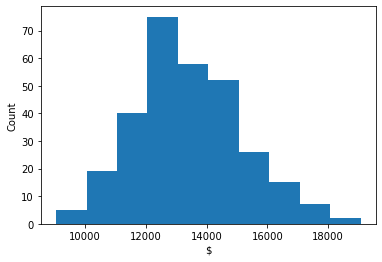

In [21]:
plt.hist(random_sample_mean_list)
plt.xlabel('$')
plt.ylabel('Count')


The results above show that the mean of the means was $13k, and the std was $1.7k. If we run this again, only changing the number of samples from 300 to 1,000 we should see an improved distribution. 

In [22]:
random_sample_mean_list = []
start = 1

In [23]:
while start < 1000:
    med_sample2 = medical_sampler(50)
    mean = np.mean(med_sample2)
    random_sample_mean_list.append(mean)
    start = start + 1

In [24]:
mean= np.mean(random_sample_mean_list)

In [25]:
mean

13246.530276158739

In [26]:
std = np.std(random_sample_mean_list,ddof=1)

In [27]:
std

1699.506162522097

Text(0, 0.5, 'Count')

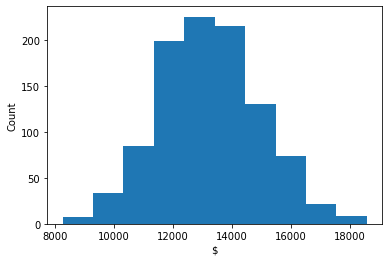

In [28]:
plt.hist(random_sample_mean_list)
plt.xlabel('$')
plt.ylabel('Count')

The results above show that indeed the more samples improved the overall distribution improved and became more balanced, and the the stardard deviation narrowed. If we increase the bin size to 20 (as shown below) it makes the distribution of the data more clear. 

Text(0, 0.5, 'Count')

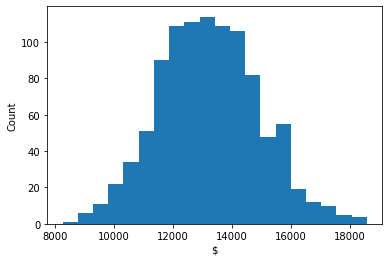

In [29]:
plt.hist(random_sample_mean_list,bins =20)
plt.xlabel('$')
plt.ylabel('Count')

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__

A one sided interval is more appropriate given the administratior is concerned about the possibility of the mean being less than 12,000. Based on the data shown below, with 95% confidence we can conclude that the population mean is between $13,139 - $13,348. There is a 22% probability that that mean is $12,000 or less. Based on this information, I don't believe the administrator should be very concerned as there is 3X the probability that the mean is over $12,000 than under $12,000. That being said, given that the mean is highly likley to be around $13K, there is not a lot of wiggle room and thus it might be worth collecting a few more samples before a formal conclusion is made.  

In [30]:
from scipy.stats import norm

In [31]:
confidence = 0.95
z_critical = norm.ppf(q = confidence + (1 - confidence) / 2)
print('z-critical value:', z_critical) 

z-critical value: 1.959963984540054


In [32]:
margin_of_error = z_critical * (std / np.sqrt(999))
confint = mean - margin_of_error, mean + margin_of_error
print('point esimate:', mean)
print('Confidence interval:', confint)
print("margin of error: " , margin_of_error)

point esimate: 13246.530276158739
Confidence interval: (13141.143021661273, 13351.917530656205)
margin of error:  105.38725449746482


In [33]:
norm.cdf(12000, loc=mean, scale=std)

0.231637076932263

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__The null hypothesis is that the charges for the group with insurance is the same as the group without insurance. The alterative hypothesis is that the mean of the two groups is different. 


We are assuming that the variances of the two groups is equal.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

A: Manual calc below:
 

In [34]:
difference_avgs = 16424 - 8821 
difference_avgs

7603

In [35]:
s_p = (((783-1)* (14036**2)) + ((555-1) * (6441**2))) / (783+555 -2)

In [36]:
s_p

132518547.86377245

In [37]:
s_p_sqrt= np.sqrt(s_p)
s_p_sqrt

11511.67007274672

In [38]:
t = difference_avgs/(s_p_sqrt*np.sqrt((1/783) + (1/555)))

In [39]:
t

11.902713281984813

__A:__ The t-test revealed a pvalue less than .05, therefore we reject the null hypothesis that these groups have the same populaion mean, and accept the alternative hypothesis that these groups have different population means. Therefore we can conclude that indeed there is a difference in charges between the insurance and non-insurance groups.

Below shows the same steps performed above, only this time seperately for the group with and without insurance to compare befofe performming the t test. 

In [40]:
ins_group = medical[medical['insuranceclaim']==1]

In [41]:
ins_group.shape

(783, 8)

In [42]:
ins_mean=np.mean(ins_group['charges'])
ins_mean

16423.928276537663

In [43]:
ins_std=np.std(ins_group['charges'])
ins_std

14036.956250260411

Text(0, 0.5, 'Count')

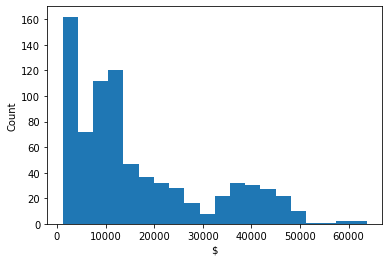

In [44]:
plt.hist(ins_group['charges'],bins =20)
plt.xlabel('$')
plt.ylabel('Count')

In [45]:
def Ins(n):
    return np.random.choice(ins_group['charges'], n)

In [46]:
random_sample_mean_list = []
start = 1

In [47]:
while start < 300:
    ins_sampler = Ins(30)
    mean = np.mean(ins_sampler)
    random_sample_mean_list.append(mean)
    start = start + 1

Text(0, 0.5, 'Count')

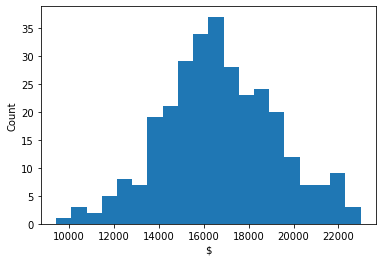

In [48]:
plt.hist(random_sample_mean_list,bins =20)
plt.xlabel('$')
plt.ylabel('Count')

In [49]:
np.mean(random_sample_mean_list)

16715.91441771003

In [50]:
no_ins_group=medical[medical['insuranceclaim']!=1]

In [51]:
no_ins_group.shape

(555, 8)

In [52]:
no_ins_mean = np.mean(no_ins_group['charges'])
no_ins_mean

8821.421892306294

In [53]:
no_ins_std = np.std(no_ins_group['charges'])
no_ins_std

6440.699841605233

Text(0, 0.5, 'Count')

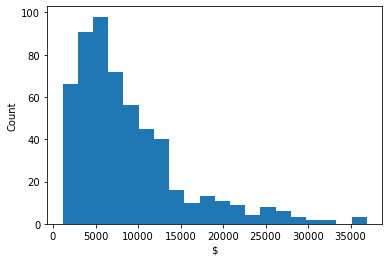

In [54]:
plt.hist(no_ins_group['charges'],bins =20)
plt.xlabel('$')
plt.ylabel('Count')

In [55]:
def No_Ins(n):
    return np.random.choice(no_ins_group['charges'], n)

In [56]:
random_sample_mean_list = []
start = 1

In [57]:
while start < 300:
    ins_sampler = No_Ins(30)
    mean = np.mean(ins_sampler)
    random_sample_mean_list.append(mean)
    start = start + 1

Text(0, 0.5, 'Count')

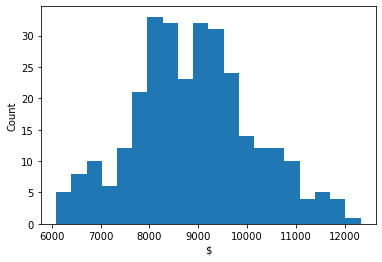

In [58]:
plt.hist(random_sample_mean_list,bins =20)
plt.xlabel('$')
plt.ylabel('Count')

In [59]:
np.mean(random_sample_mean_list)

8909.079934014493

# T Test

In [60]:
stats.ttest_ind(ins_group['charges'], no_ins_group['charges'])

Ttest_indResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Below is the function for finding the zsore. 

zscore(a[, axis, ddof, nan_policy])



## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test